# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# # load relabeled_weighted_avg.pkl
# import pickle
# with open(data_dir + '/relabeled_weighted_avg.pkl', 'rb') as f:
#     relabeled_weighted_avg = pickle.load(f)

In [2]:
# save ds_sat['age'] to .csv
ds_sat['age'].to_dataframe().to_csv('LGMR_age.csv')

# Load the weighted average from the ensemble data

In [3]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

In [4]:
for i in range(4):

    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]
    print(len(weighted_avg_curves_k))
    # print the variable type of weighted_avg_curves_k
    print(type(weighted_avg_curves_k))

500
<class 'list'>
500
<class 'list'>
500
<class 'list'>
500
<class 'list'>


In [8]:
import numpy as np
import pandas as pd

for i in range(4):
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]
    print(len(weighted_avg_curves_k))
    print(type(weighted_avg_curves_k))

    # Convert the list of ndarrays to a numpy array and then transpose it
    array_k = np.array(weighted_avg_curves_k)
    transposed_array_k = array_k.T  # Transpose to make each row an original array and each column a different measurement

    # Convert the transposed array into a DataFrame
    df_k = pd.DataFrame(transposed_array_k)

    # Save the DataFrame to a CSV file
    filename = f"LGMR_class_{i}.csv"
    df_k.to_csv(filename, index=False)
    print(f"Saved file: {filename}")


500
<class 'list'>
Saved file: LGMR_class_0.csv
500
<class 'list'>
Saved file: LGMR_class_1.csv
500
<class 'list'>
Saved file: LGMR_class_2.csv
500
<class 'list'>
Saved file: LGMR_class_3.csv


# Load TraCE data

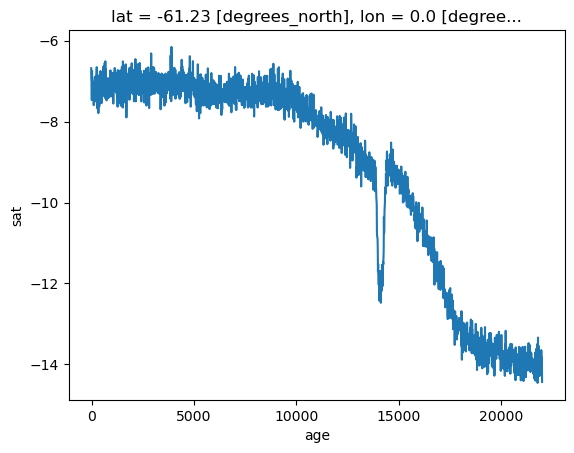

In [5]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]

ds_trace=ds

ds_trace['sat'].isel(lat=7, lon=0).plot()


In [6]:
# read the TraCE_weighted_avg_LGMR_mask.pkl
import pickle
with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_weighted_avg_LGMR_mask = pickle.load(f)

In [11]:
# save TraCE_weighted_avg_LGMR_mask[i], where i=0,1,2,3 to .csv
import numpy as np
import pandas as pd

for i in range(4):
    # Convert the list of ndarrays to a numpy array and then transpose it
    array_k = np.array(TraCE_weighted_avg_LGMR_mask[i])
    transposed_array_k = array_k.T  # Transpose to make each row an original array and each column a different measurement

    # Convert the transposed array into a DataFrame
    df_k = pd.DataFrame(transposed_array_k)

    # Save the DataFrame to a CSV file
    filename = f"TraCE_class_{i}.csv"
    df_k.to_csv(filename, index=False)

In [14]:
# save ds_trace['age'] to .csv
df_age = ds_trace['age'].to_dataframe()
df_age.to_csv('TraCE_age.csv')

In [8]:
import numpy as np

cp_age_bootstrap = np.array([20926, 16932, 17101, 16894])
cp_age_bootstrap_CI = np.array([
    [21270, 20813],
    [17358, 16813],
    [17190, 17010],
    [17142, 16647]
])


# Plot

\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
cp_age: 20900.0
age_CI_text: 21865-20408
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
cp_age: 17300.0
age_CI_text: 17656-16728
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
cp_age: 17100.0
age_CI_text: 17291-16626
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
cp_age: 16900.0
age_CI_text: 17373-16504


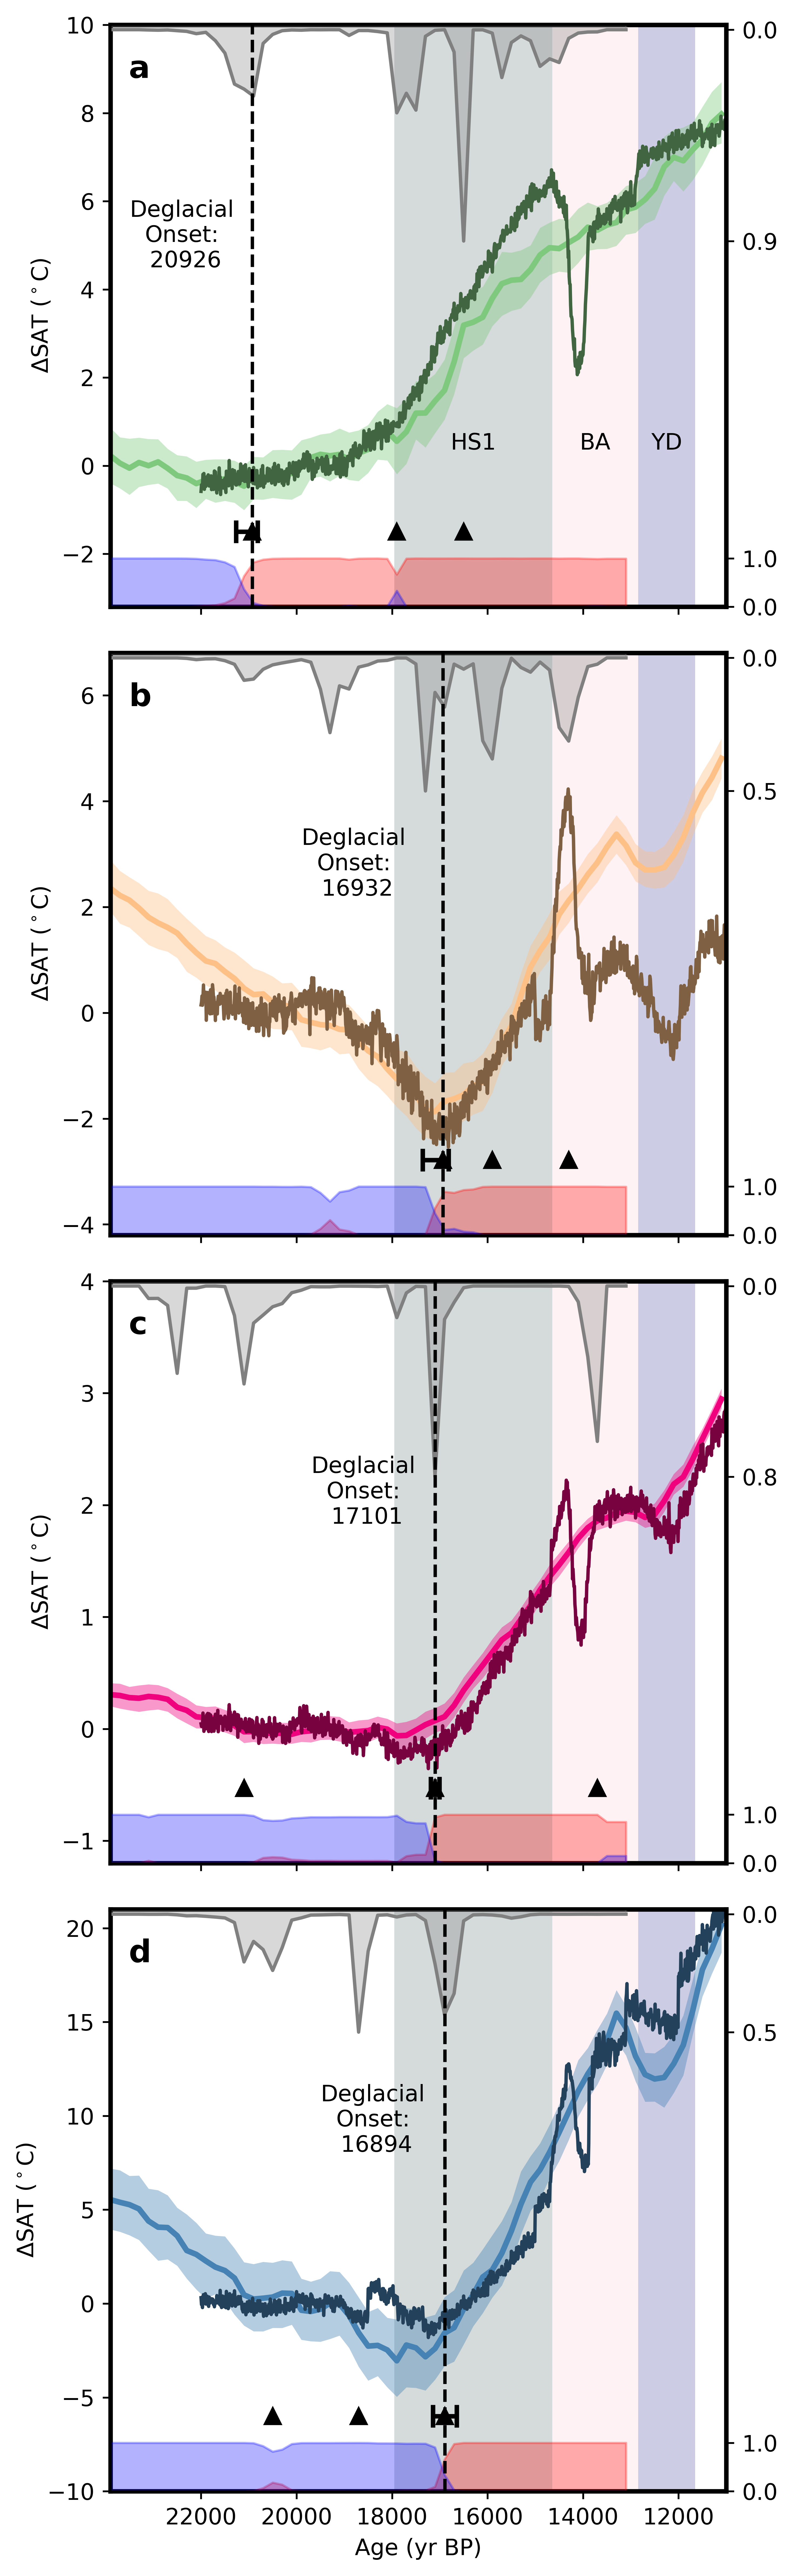

In [10]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-3.2,10],[-4.2,6.8],[-1.2,4],[-10,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    # find the value in the cp_age_all that equals to cp_age and drop it
    cp_age_all = np.delete(cp_age_all, np.where(cp_age_all == cp_age))

    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='k', linestyle='None')
    # add the error bar for the cp ci
    # if i==0:
    ax1.errorbar(cp_age_bootstrap[i], np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), xerr=[[cp_age_bootstrap[i]-cp_age_bootstrap_CI[i,1]],[cp_age_bootstrap_CI[i,0]-cp_age_bootstrap[i]]], fmt='^', color='k', markersize=7, capsize=5, capthick=2, elinewidth=2)
        
    # else:
        # ax1.errorbar(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), xerr=[[cp_age-cp_age_CI[1]],[cp_age_CI[0]-cp_age]], fmt='^', color='k', markersize=7, capsize=5, capthick=2, elinewidth=2)
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    # ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base), color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 12])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    # ax2.axvline(x=cp_age, color='k', linestyle='--')
    # plot a vertical line at cp_age_bootstraps
    ax2.axvline(x=cp_age_bootstrap[i], color='k', linestyle='--')

    # add text to show the cp_age
    age_text=str(int(cp_age_bootstrap[i]))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('cp_age:', cp_age)
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
cp_age: 20900.0
age_CI_text: 21928-20387
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [15. 23. 33. 40. 48.]
selected_cp_index: 2
cp_age: 17300.0
age_CI_text: 17634-16748
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
cp_age: 17100.0
age_CI_text: 17290-16668
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
cp_age: 16900.0
age_CI_text: 17351-16508


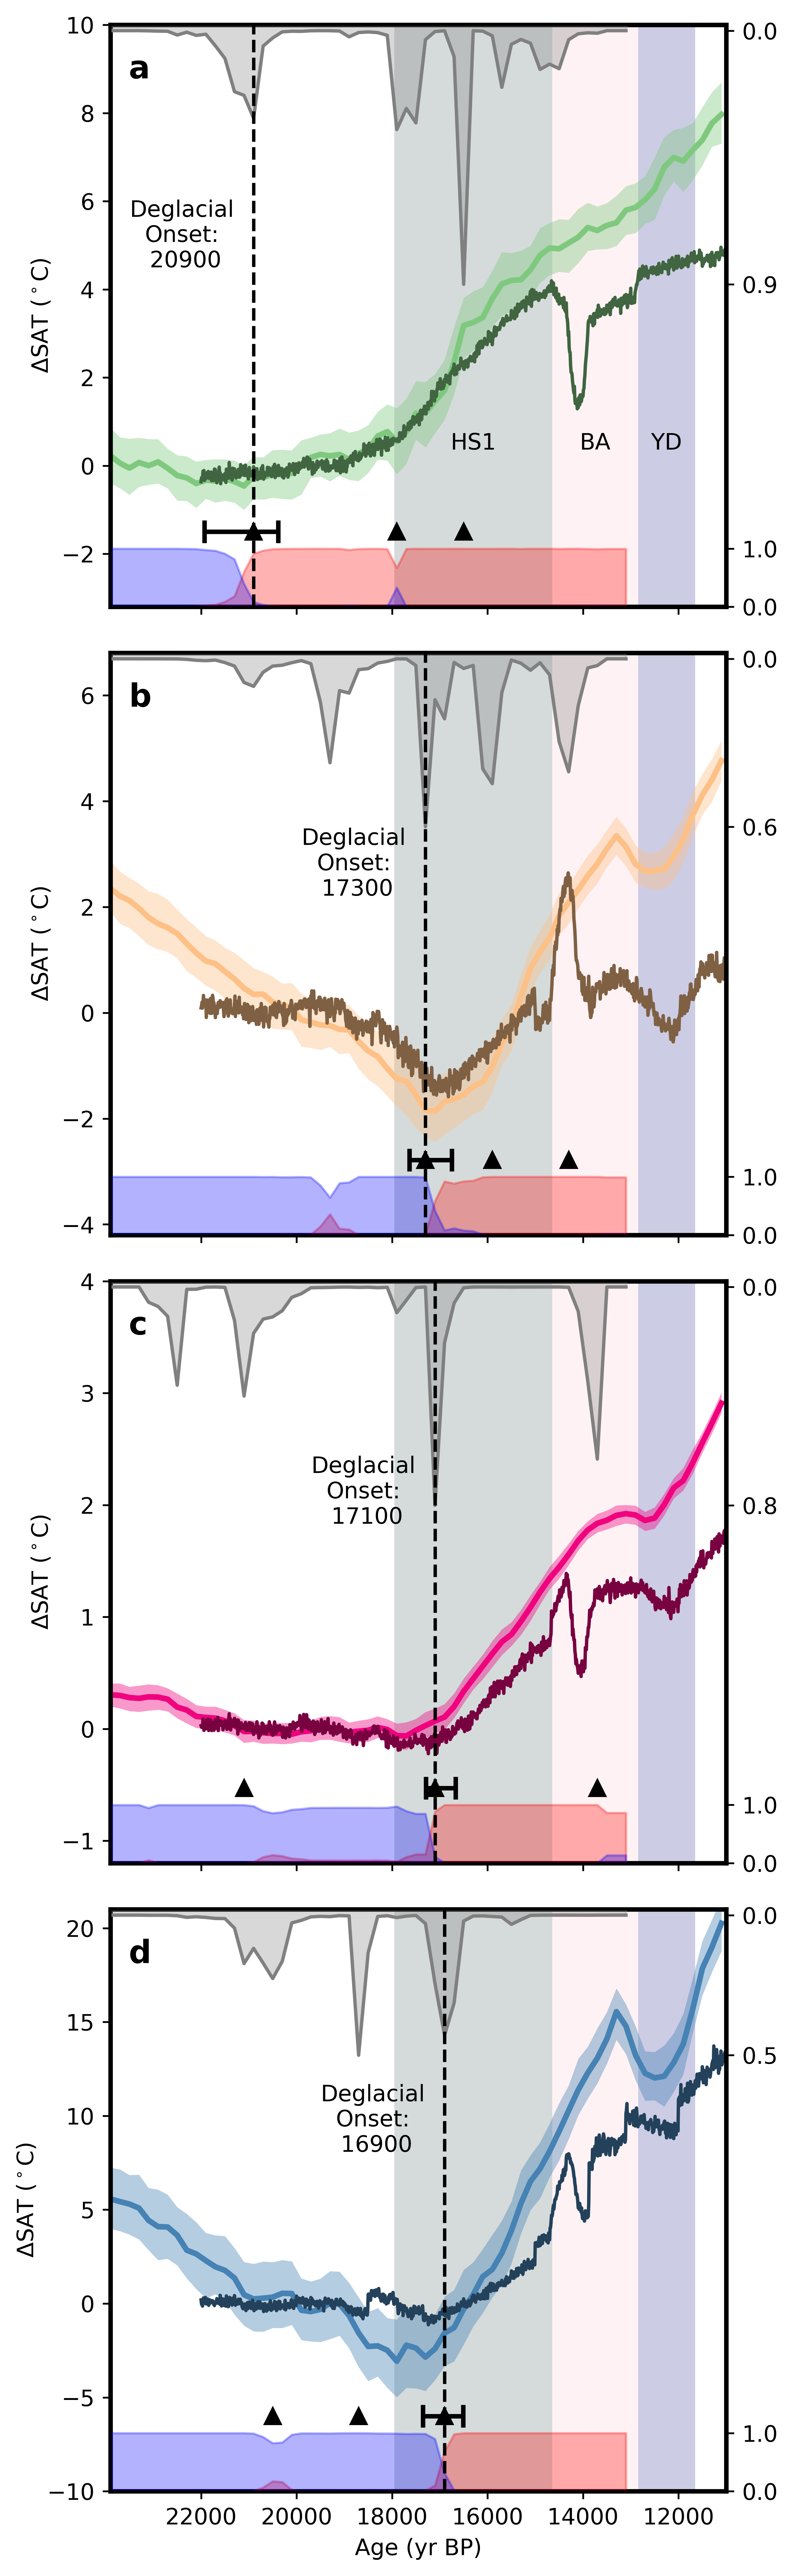

In [14]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-3.2,10],[-4.2,6.8],[-1.2,4],[-10,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='k', linestyle='None')
    # add the error bar for the cp ci
    ax1.errorbar(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), xerr=[[cp_age-cp_age_CI[1]],[cp_age_CI[0]-cp_age]], fmt='none', color='k', capsize=5, capthick=2, elinewidth=2)
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    # ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base), color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('cp_age:', cp_age)
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


# Same, but the data was first interpolated to 1-yr resolution

|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 144
cps [ 66. 145. 206. 248. 295. 350. 368. 464. 572. 594.]
selected_cp_index: 1
age_CI_text: 21289-20925
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 329
cps [138. 197. 244. 329. 394. 434. 468. 534. 577. 581.]
selected_cp_index: 3
age_CI_text: 17339-17240
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 567
cps [ 65. 137. 200. 298. 351. 414. 500. 537. 568. 598.]
selected_cp_index: 8
age_CI_text: 12597-12457
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 564
cps [138. 196. 242. 270. 305. 338. 420. 530. 564. 593.]
selected_cp_index: 8
age_CI_text: 12677-12557


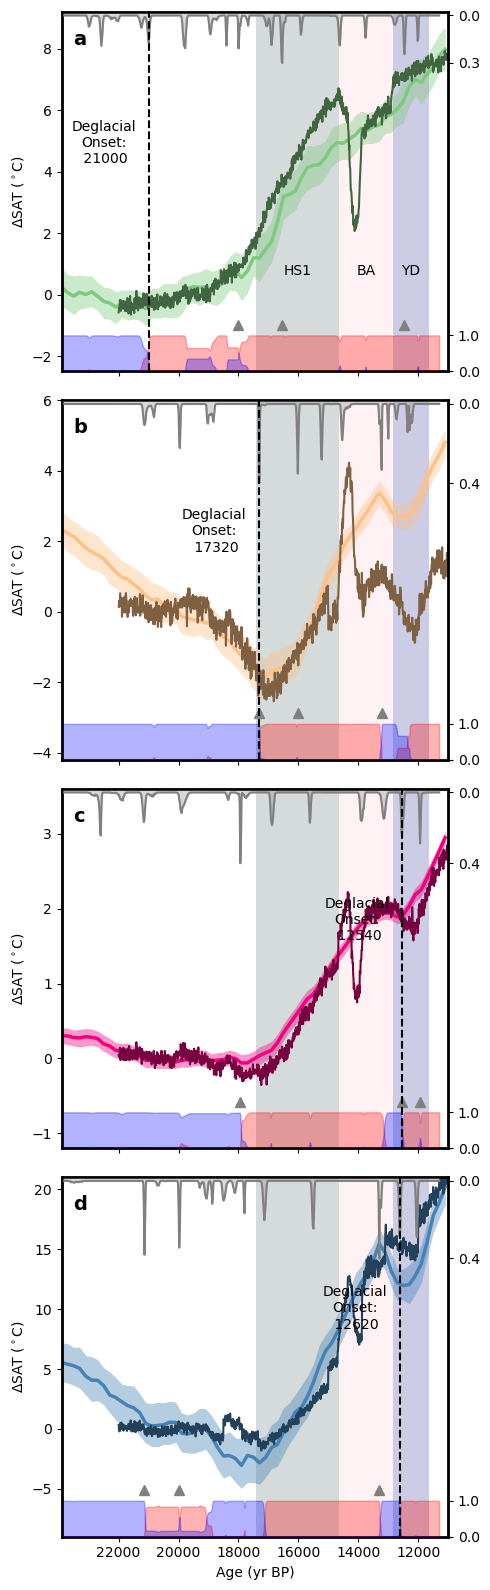

In [21]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=100,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-2.5,9.2],[-4.2,6],[-1.2,3.6],[-9,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    age_step=20
    # interpolate the ds_sat['age'], weighted_avg_curves_k_median to 1 yr resolution
    age_interp=np.arange(ds_sat['age'].values[0],ds_sat['age'].values[-1]+1,age_step)
    weighted_avg_curves_k_median_interp=np.interp(age_interp,ds_sat['age'].values,weighted_avg_curves_k_median)

    # Calculate the cp_info for the median of each dataset
    # cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    cp_info = cpf.find_cp(weighted_avg_curves_k_median_interp, age_interp, age_step=age_step, rb_plot=False)



    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='grey', linestyle='None')
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()
